### Student Information
Name: 黃乙鐘 

Student ID: 109062807

GitHub ID: arthurich

Kaggle name: ich458

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

In [2]:
#Load data
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
import keras

2022-11-24 10:31:07.321289: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [6]:
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head(8)

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
5,10005,My blood is boiling,anger,0.875
6,10006,When you've still got a whole season of Wentwo...,anger,0.875
7,10007,@bt_uk why does tracking show my equipment del...,anger,0.875


In [7]:
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [8]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [10]:
print(str(train_df['text'][:1]))

1494    @JTregManc it's fair to say he's been a bit ti...
Name: text, dtype: object


/var/folders/r8/lbpqdx9s0278tyhvz_jv_q2r0000gn/T/ipykernel_2806/1359743114.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(str(train_df['text'][:1]))


In [11]:
train_df.head(30)
import nltk
import helpers.data_mining_helpers as dmh
trains=dmh.tokenize_text(str(train_df['text']))
tests=dmh.tokenize_text(str(test_df['text']))

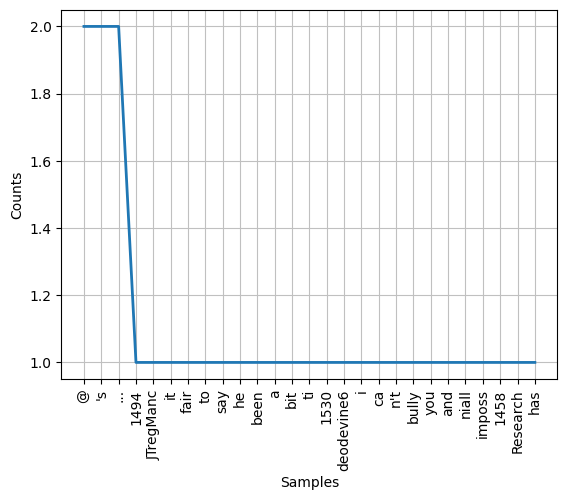

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [12]:
fd = nltk.FreqDist(trains[:30])
fd.plot(30,cumulative=False)

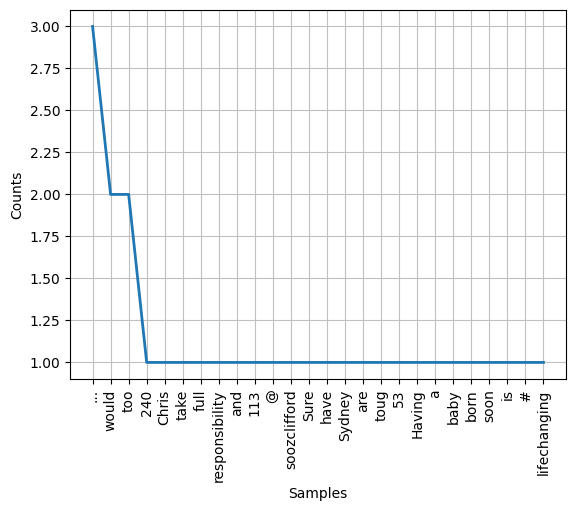

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [13]:
fd = nltk.FreqDist(tests[:30])
fd.plot(30,cumulative=False)

In [14]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [15]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [16]:
#1.3 EDA
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

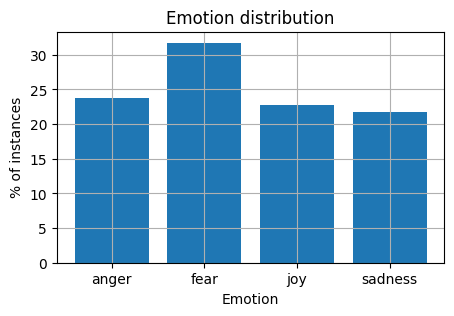

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [19]:
# 2 Feature Engineering
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [22]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [23]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [24]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [26]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

In [27]:
"😂" in feature_names

False

In [28]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [29]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['change',
 'cheer',
 'cheerful',
 'cheerfully',
 'cheering',
 'cheery',
 'come',
 'comes',
 'could',
 'country']

In [31]:
"😂" in feature_names_500

True

In [32]:
#exercise 2
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_vectorizer = TfidfVectorizer() 
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
tfid_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_tfid_features = tfid_vectorizer.transform(train_df['text'])
test_data_tfid_features = tfid_vectorizer.transform(test_df['text'])
# build analyzers (tf-idf)
tfid_vectorizer_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
tfid_vectorizer_1000.fit(train_df['text'])

tfid_vectorizer_features_1000 = tfid_vectorizer_1000.transform(train_df['text'])

## check dimension
tfid_vectorizer_features_1000.shape

feature_names_1000 = tfid_vectorizer_1000.get_feature_names()
feature_names_1000[100:110]

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

In [33]:
#3. Model
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [34]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'fear', 'joy', 'anger', 'joy', 'joy', 'anger', 'fear',
       'fear', 'fear'], dtype=object)

In [35]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [36]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.66      0.69      0.68       110
         joy       0.70      0.68      0.69        79
     sadness       0.65      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [37]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 20  5  4]
 [16 76  8 10]
 [ 7  8 54 10]
 [ 9 11 10 44]]


In [38]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

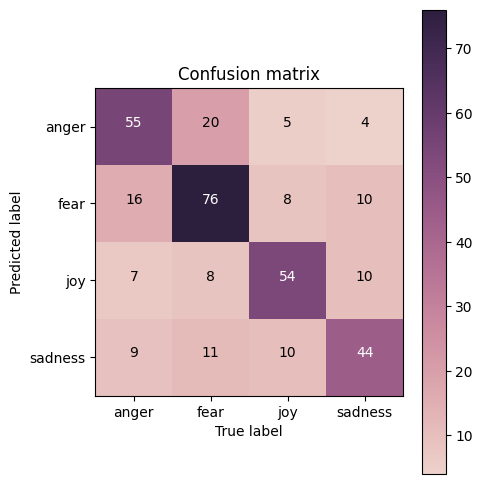

In [39]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [40]:
#Exercise 3
# Answer here
#anger total is 53+10+6+11=80, where 53 are predicted correct, 10 is predicted 'fear',6 'joy', 11 'sadness'
#fear total is 19+75+12+10=116, where 75 are predicted correct, 19 is predicted 'anger',11 'joy', 10 'sadness'
#sadness and joy are the same as above.
train_df['text']

1494    @JTregManc it's fair to say he's been a bit ti...
1530    @deodevine6 i can't bully you and niall imposs...
1458    Research has determined 70% of #laughter is ac...
2334    @lawson__lynch my kinda girl pleasing the dick...
2548    @veggiesausage that happens...u will be ok tom...
                              ...                        
1077    There's always that one song which makes you t...
111     I'm about to block everyone everywhere posting...
1033               My anxiety is playing around HELP!!!!!
2151      @Norn_IronMaiden @forest_fr1ends It's hilarious
417     I am using twitter as a coping mechanism for r...
Name: text, Length: 3613, dtype: object

In [41]:
#Exercise 4
## build DecisionTree model
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()

## training!
NB_model =NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'sadness', 'sadness', 'fear', 'sadness', 'anger',
       'fear', 'fear', 'anger', 'fear'], dtype='<U7')

In [ ]:
#Exercise 5
'''
For a small dataset, we may get better result by using the NB model. 
The cons of decision tree model is overfitting. 
After running more epochs, we will find that the performance gets worse. 
We have to do pre-pruning and post-pruning for getting better result.
As we have learnt from the class, decision tree can find its own rule in classifying, 
but taking too much useless feartures to make result that we can't expect.
'''

In [42]:


acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [43]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [44]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1494    fear
1530    fear
1458    fear
2334     joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


/var/folders/r8/lbpqdx9s0278tyhvz_jv_q2r0000gn/T/ipykernel_2806/4010399732.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print('y_train[0:4]:\n', y_train[0:4])


In [46]:
#6.3 Build Model
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [47]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

2022-11-24 11:45:15.940024: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [48]:
print(y_test)

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [49]:
print(X_test)

  (0, 18)	1
  (0, 42)	2
  (0, 50)	1
  (0, 186)	1
  (0, 205)	1
  (0, 216)	1
  (0, 340)	1
  (0, 397)	1
  (0, 411)	1
  (0, 429)	1
  (0, 447)	1
  (0, 454)	1
  (0, 461)	1
  (0, 479)	1
  (0, 487)	2
  (1, 1)	1
  (1, 5)	1
  (1, 15)	1
  (1, 18)	1
  (1, 20)	1
  (1, 30)	1
  (1, 50)	1
  (1, 59)	1
  (1, 150)	1
  (1, 192)	1
  :	:
  (345, 240)	1
  (345, 302)	1
  (345, 305)	1
  (345, 347)	1
  (345, 434)	1
  (345, 491)	1
  (346, 1)	1
  (346, 18)	1
  (346, 21)	1
  (346, 30)	2
  (346, 74)	1
  (346, 121)	1
  (346, 134)	1
  (346, 150)	1
  (346, 167)	1
  (346, 173)	1
  (346, 209)	1
  (346, 264)	1
  (346, 279)	1
  (346, 292)	1
  (346, 302)	1
  (346, 386)	1
  (346, 429)	1
  (346, 449)	1
  (346, 463)	1


In [50]:
#6.4 Train
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 1s 3ms/step - loss: 1.3282 - accuracy: 0.3640 - val_loss: 1.2826 - val_accuracy: 0.3804
Epoch 2/25
113/113 [==============================] - 0s 1ms/step - loss: 0.9895 - accuracy: 0.6399 - val_loss: 0.9172 - val_accuracy: 0.6657
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.7863 - val_loss: 0.7951 - val_accuracy: 0.6945
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8469 - val_loss: 0.7652 - val_accuracy: 0.7003
Epoch 5/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8793 - val_loss: 0.8018 - val_accuracy: 0.6974
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.9056 - val_loss: 0.8526 - val_accuracy: 0.7061
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9308 - val_loss: 0.9306 - val_accuracy: 0.7032
Epoch 8/25
113/11

In [51]:
### 6.5 Predict on testing data
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 2ms/step


array([[2.9263578e-04, 1.8262930e-01, 2.0088179e-02, 7.9698980e-01],
       [2.2338095e-07, 4.1083112e-02, 2.8144798e-08, 9.5891666e-01],
       [5.4103488e-01, 1.3336925e-05, 1.2763302e-05, 4.5893899e-01],
       [8.5466482e-02, 9.0517706e-01, 9.3538379e-03, 2.5849690e-06],
       [2.8624810e-02, 7.6860452e-01, 2.0581146e-04, 2.0256488e-01]],
      dtype=float32)

In [52]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'sadness', 'anger', 'fear', 'fear'], dtype=object)

In [53]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [54]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.363963,1.328199,0.380403,1.282601
1,1,0.639911,0.989507,0.665706,0.917179
2,2,0.786327,0.593222,0.694524,0.795123
3,3,0.846942,0.420697,0.700288,0.765218
4,4,0.879325,0.334119,0.697406,0.801763
5,5,0.905619,0.275309,0.706052,0.852605
6,6,0.930805,0.224222,0.703170,0.930579
7,7,0.940216,0.187460,0.671470,0.992866
8,8,0.951564,0.162329,0.703170,1.019903
9,9,0.957099,0.141923,0.682997,1.052137


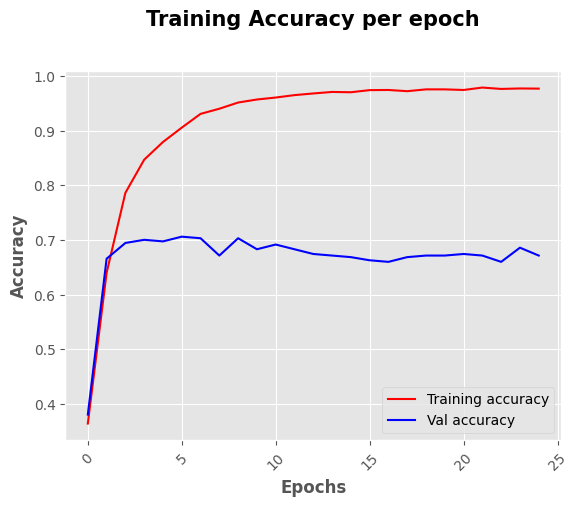

In [55]:
### ** >>> Exercise 6 (Take home): **  
# Answer here
import matplotlib.pyplot as plt
plt.style.use("ggplot")               # 使用ggplot主題樣式

#畫第一條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = 紅色
plt.plot(training_log["epoch"], training_log["accuracy"],c = "r")  
#畫第二條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料、線顏色 = 綠色及線型式 = -.
plt.plot(training_log["epoch"], training_log["val_accuracy"], c="b")

# 設定圖例，參數為標籤、位置
plt.legend(labels=["Training accuracy", "Val accuracy"], loc = 'best')
plt.xlabel("Epochs", fontweight = "bold")                # 設定x軸標題及粗體
plt.ylabel("Accuracy", fontweight = "bold")    # 設定y軸標題及粗體
plt.title("Training Accuracy per epoch", fontsize = 15, fontweight = "bold", y = 1.1)   # 設定標題、文字大小、粗體及位置
plt.xticks(rotation=45)   # 將x軸數字旋轉45度，避免文字重疊

plt.show()

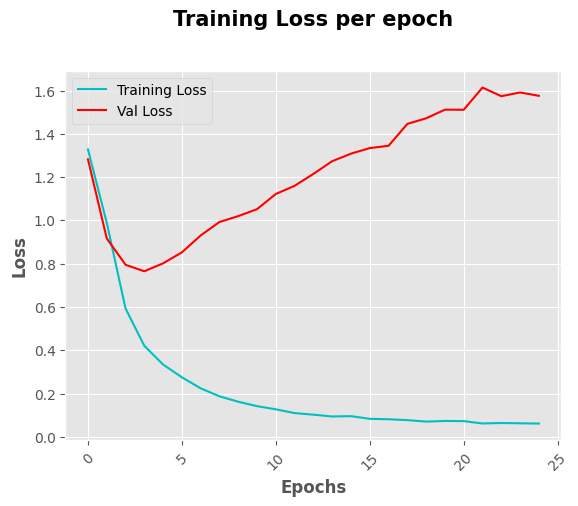

In [59]:
# Answer here
import matplotlib.pyplot as plt
plt.style.use("ggplot")               # 使用ggplot主題樣式

#畫第一條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = c
plt.plot(training_log["epoch"], training_log["loss"],c = "c")  
#畫第二條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料、線顏色 = 綠色及線型式 = -.
plt.plot(training_log["epoch"], training_log["val_loss"], c="r")

# 設定圖例，參數為標籤、位置
plt.legend(labels=["Training Loss", "Val Loss"], loc = 'best')
plt.xlabel("Epochs", fontweight = "bold")                # 設定x軸標題及粗體
plt.ylabel("Loss", fontweight = "bold")    # 設定y軸標題及粗體
plt.title("Training Loss per epoch", fontsize = 15, fontweight = "bold", y = 1.1)   # 設定標題、文字大小、粗體及位置
plt.xticks(rotation=45)   # 將x軸數字旋轉45度，避免文字重疊

plt.show()

In [62]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head(6)

,id,text,text_tokenized
1494,20637,@JTregManc it's fair to say he's been a bit ti...,"[@, JTregManc, it, 's, fair, to, say, he, 's, ..."
1530,20673,@deodevine6 i can't bully you and niall imposs...,"[@, deodevine6, i, ca, n't, bully, you, and, n..."
1458,20601,Research has determined 70% of #laughter is ac...,"[Research, has, determined, 70, %, of, #, laug..."
2334,30330,@lawson__lynch my kinda girl pleasing the dick...,"[@, lawson__lynch, my, kinda, girl, pleasing, ..."
2548,30544,@veggiesausage that happens...u will be ok tom...,"[@, veggiesausage, that, happens, ..., u, will..."
1718,20861,Jeans with fake pockets #horrible,"[Jeans, with, fake, pockets, #, horrible]"


In [63]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'JTregManc', 'it', "'s", 'fair', 'to', 'say', 'he', "'s", 'been', 'a', 'bit', 'timid', 'compared', 'to', 'what', 'I', "'ve", 'been', 'known', 'to', 'see', 'from', 'him']),
       list(['@', 'deodevine6', 'i', 'ca', "n't", 'bully', 'you', 'and', 'niall', 'impossible😙']),
       list(['Research', 'has', 'determined', '70', '%', 'of', '#', 'laughter', 'is', 'actually', '#', 'anxiety', '.'])],
      dtype=object)

In [64]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1494,20637,@JTregManc it's fair to say he's been a bit ti...,"[@, JTregManc, it, 's, fair, to, say, he, 's, ..."
1530,20673,@deodevine6 i can't bully you and niall imposs...,"[@, deodevine6, i, ca, n't, bully, you, and, n..."
1458,20601,Research has determined 70% of #laughter is ac...,"[Research, has, determined, 70, %, of, #, laug..."
2334,30330,@lawson__lynch my kinda girl pleasing the dick...,"[@, lawson__lynch, my, kinda, girl, pleasing, ..."
2548,30544,@veggiesausage that happens...u will be ok tom...,"[@, veggiesausage, that, happens, ..., u, will..."


In [65]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_iter)

In [66]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.73922276,  0.05254324, -0.3402024 , -0.21548912, -0.115361  ,
       -0.71886295,  0.5501729 ,  0.8439162 , -0.4094382 , -0.26003835,
       -0.49408206, -0.5033212 , -0.61606324, -0.02964255,  0.2695807 ,
       -0.5625959 , -0.03245345, -0.80996865, -0.11484415, -1.3159869 ,
        1.0095433 ,  0.43529224,  0.5788036 ,  0.04436607,  0.32780176,
       -0.12880307, -0.6441608 ,  0.15877385, -0.6259615 ,  0.39150453,
        0.02095213, -0.11915135,  0.5860237 , -0.5594843 , -0.12059586,
        0.538501  ,  0.27899158, -0.49220988, -1.0331273 , -0.34491757,
       -0.24009141,  0.06884722, -0.4479043 ,  0.45009977,  0.9326824 ,
       -0.55848753, -0.870649  ,  0.22967741,  0.5644068 ,  0.6168636 ,
        0.01820013, -0.79671025, -0.14388359, -0.14144248, -0.49735096,
        0.09410851, -0.41243905, -0.19478822, -0.40072507,  0.04521997,
        0.2041563 ,  0.01836574,  0.7001855 ,  0.22452703, -0.5608882 ,
        0.45597014,  0.30600345,  0.7394967 , -1.4090375 ,  0.61

In [67]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9266471266746521),
 ('smile', 0.9179702997207642),
 ('Be', 0.9169732332229614),
 ('bday', 0.9165622591972351),
 ('Abraham', 0.907751739025116),
 ("'you", 0.9009263515472412),
 ('PUSSY\\nP', 0.9003036618232727),
 ('Online', 0.8989769816398621),
 ('help', 0.897969663143158),
 ('tones', 0.8973366618156433)]

In [72]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [73]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

In [74]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [ ]:
#Exercise 7
#we may remove functional words and leave only important words
#so use "word" vectors to find out the relationship


In [75]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [76]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


In [77]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [78]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [79]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


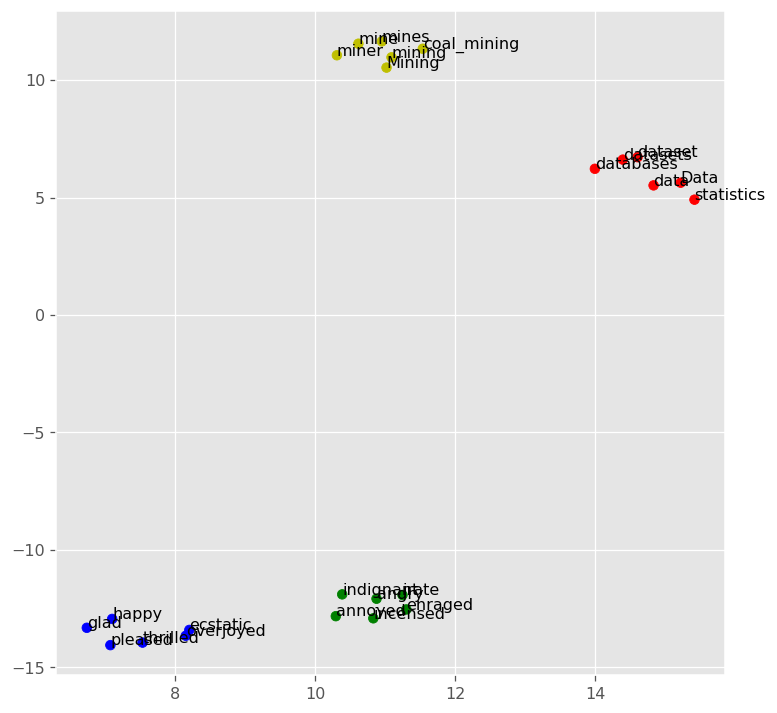

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
fear_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry', 'sad', 'Data', 'datasets', 'dataset', 'databases', 'sta

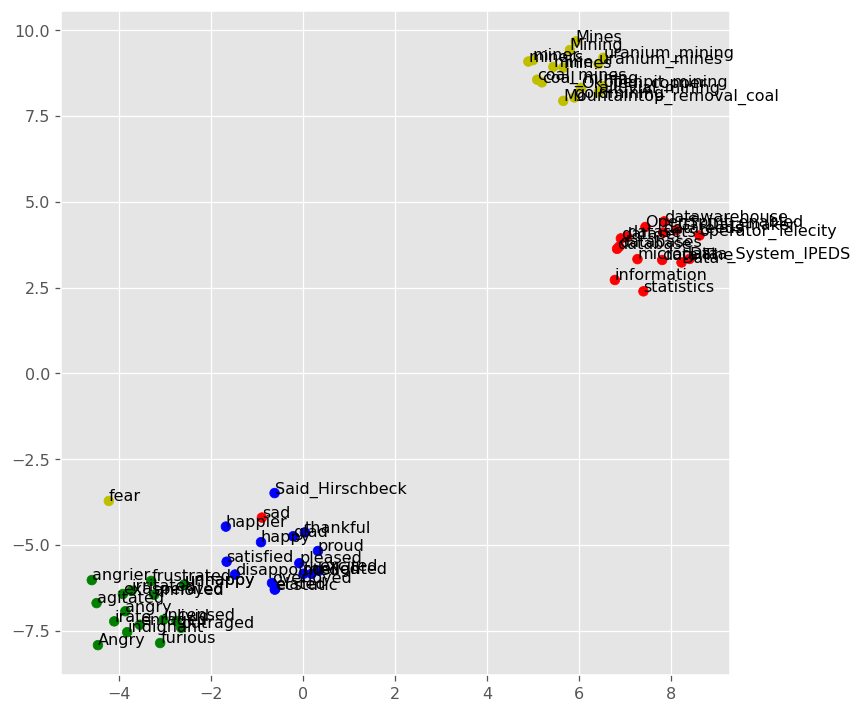

In [81]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', data_words)
print('fear_words: ', mining_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 60
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

In [82]:
####ABOVE is Part I HW2

In [83]:
####################################Take a break.....Protect your eyes.....#################################

In [84]:
### Begin Assignment Here HW Part 2 & 3

In [85]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh

import json

from tqdm.notebook import tqdm
tqdm.pandas()

In [86]:
json_tweets = []
for line in open('data/tweets_DM.json', 'r'):
    json_tweets.append(json.loads(line))

In [87]:
df_dataId = pd.read_csv('data/data_identification.csv')
df_emotion = pd.read_csv('data/emotion.csv')

In [88]:
### Create a dataframe of the tweets from tweets_DM.json
my_dict = {}
json_filtered_tweets = []

# json_decode = json.load(input_file)

### Only import the "tweet_id" and "text" from json
for item in json_tweets:
    my_dict={}
    my_dict['tweet_id']=item.get('_source').get('tweet').get('tweet_id')
    #  my_dict['hashtags']=item.get('_source').get('tweet').get('hashtags')
    my_dict['text']=item.get('_source').get('tweet').get('text')
    json_filtered_tweets.append(my_dict)

In [89]:
df_tweets = pd.DataFrame(json_filtered_tweets)

In [90]:
df_tweets.to_pickle("df_tweets_unprepro.pkl") 

In [91]:
import pandas as pd
df_tweets = pd.read_pickle("df_tweets_unprepro.pkl")

In [92]:
df_tweets.head(911)

,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...
906,0x35fce7,@Neroli_M_FOX @FOXSportsNews Dear god anyone b...
907,0x2f7e36,#ThisIsLife wow what an amazing episode. @lisa...
908,0x1cb889,Check out @keef47 #actor #talent #successful <...
909,0x2369e0,We are always getting red. <LH>


In [93]:
df_tweets.tail(4)

,tweet_id,text
1867531,0x29d0cb,I swear all this hard work gone pay off one da...
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us..."
1867534,0x34be8c,Blessed to be living #Sundayvibes <LH>


In [94]:
df_tweets.to_csv('tweesInCSV.csv', index = False)

In [95]:
outer_join_df = pd.merge(df_tweets, df_dataId, on='tweet_id', how='outer')

In [96]:
train_df = outer_join_df.loc[outer_join_df.identification == 'train'].reset_index()

In [97]:
test_df = outer_join_df.loc[outer_join_df.identification == 'test'].reset_index()

In [98]:
# append training emotion

In [99]:
train_df = pd.merge(train_df, df_emotion, on='tweet_id', how='outer')

In [100]:
train_df = train_df.drop('index', axis=1)

In [101]:
test_df = test_df.drop('index', axis=1)

In [102]:
train_df.to_pickle("train_df_unprepo.pkl") 

test_df.to_pickle("test_df_unprepo.pkl") 

In [103]:
#######DATA Clean

In [104]:
#load pd for we repeat cleaning data......
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df_unprepo.pkl")
test_df = pd.read_pickle("test_df_unprepo.pkl")

In [105]:
#use beautiful soup
from bs4 import BeautifulSoup
import re
import itertools


def load_dict_smileys():
    return {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }


def load_dict_contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "i'd":"i would",
        "i'll":"i will",
        "i'm":"i am",
        "i'm'a":"i am about to",
        "i'm'o":"i am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "i've":"i have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "whatcha":"what are you",
        "luv":"love",
        "sux":"sucks"
        }


def strip_accents(text):
    if 'ø' in text or  'Ø' in text:
        ## Do nothing when finding ø 
        return text   
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)

In [106]:
def cleaning_part1(tweet):
    tweet = tweet.lower()
    CONTRACTIONS = load_dict_contractions()
    tweet = tweet.replace("’","'")
    words = tweet.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    tweet = " ".join(reformed)
    
    return tweet



def cleaning_part2(tweet):    
    
    ## Escaping HTML characters
    tweet = BeautifulSoup(tweet).get_text()
    
    ## Special case not handled previously.
    tweet = tweet.replace('\x92',"'")

    ## Standardizing words
    tweet = ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet))
    
    ## Deal with smileys
    SMILEY = load_dict_smileys()  
    words = tweet.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    tweet = " ".join(reformed)
    
    tweet = re.sub(r'http\S+', ' ', tweet) # remove urls
    tweet = re.sub(r'@\w+',' ',tweet)      # remove mentions
    tweet = re.sub(r'#', ' ', tweet)       # remove hastags
    tweet = re.sub(r'<.*?>',' ', tweet)    # remove html tags
    tweet = re.sub(r'[\.\,\!\?\:\;\-\=\_\~]',' ', tweet)  # remove html tags

    ## Strip accents
    tweet = strip_accents(tweet)
    tweet = ' '.join(tweet.split())
    tweet = tweet.replace('"', ' ')

    return tweet

In [107]:
#pip3.9 install emoji
from helpers.TweetNormalizer import normalizeTweet


def bertweet_normalize(text):
    return normalizeTweet(text)

In [108]:
n = 13

print(train_df.text[n])

part1 = cleaning_part1(train_df.text[n])
print(part1)

line = bertweet_normalize(part1)
print(line)

part2 = cleaning_part2(line)
print(part2)

line2 = bertweet_normalize(part2)
print(line2)

Progress at House Meyer, Pre Galv sub frame going in.  #maintenancefreesubframe #evatech <LH> #bendingcomposite #inovarsandtoncrew
progress at house meyer, pre galv sub frame going in. #maintenancefreesubframe #evatech <lh> #bendingcomposite #inovarsandtoncrew
progress at house meyer , pre galv sub frame going in . #maintenancefreesubframe #evatech <lh> #bendingcomposite #inovarsandtoncrew
progress at house meyer pre galv sub frame going in maintenancefreesubframe evatech bendingcomposite inovarsandtoncrew
progress at house meyer pre galv sub frame going in maintenancefreesubframe evatech bendingcomposite inovarsandtoncrew


In [109]:
train_df['text'] = train_df['text'].progress_apply(lambda x: cleaning_part1(x))
train_df['text'] = train_df['text'].progress_apply(lambda x: bertweet_normalize(x))
train_df['text'] = train_df['text'].progress_apply(lambda x: cleaning_part2(x))
train_df['text'] = train_df['text'].progress_apply(lambda x: bertweet_normalize(x))

  0%|          | 0/1455563 [00:00<?, ?it/s]

  0%|          | 0/1455563 [00:00<?, ?it/s]

  0%|          | 0/1455563 [00:00<?, ?it/s]

  0%|          | 0/1455563 [00:00<?, ?it/s]

In [37]:
## Using BOW

In [110]:
from sklearn.feature_extraction.text import CountVectorizer

In [111]:
import nltk

# build analyzers (bag-of-words)
BOW = CountVectorizer(tokenizer=nltk.word_tokenize) 

In [112]:
BOW.fit(train_df['text'])

CountVectorizer(tokenizer=<function word_tokenize at 0x7f94456741f0>)

In [113]:
X_train = BOW.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW.transform(test_df['text'])

In [114]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1455563, 454321)
(1455563,)
(411972, 454321)


In [115]:
##Clasification: Naive Bayes

In [116]:
from sklearn.naive_bayes import MultinomialNB

mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train, y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [117]:
test_result = mnb_tfidf.predict(X_test)

In [118]:
test_result.shape

(411972,)

In [ ]:
#BOW 500

In [ ]:
##submission_bertweet_bow.csv

In [119]:
from sklearn.feature_extraction.text import CountVectorizer

In [120]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

In [121]:
# apply analyzer to training data
BOW_500.fit(train_df['text'])

CountVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x7f94456741f0>)

In [122]:
"😂" in BOW_500.get_feature_names()

False

In [123]:
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])

In [124]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1455563, 500)
(1455563,)
(411972, 500)


In [ ]:
#Naive Bayes

In [125]:
from sklearn.naive_bayes import MultinomialNB

mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train, y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [126]:
### Test result
test_result = mnb_tfidf.predict(X_test)

In [127]:
test_result.shape

(411972,)

In [ ]:
#BOW 1000

In [128]:
BOW_1000 = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

In [129]:
BOW_1000.fit(train_df['text'])

X_train = BOW_1000.transform(train_df['text'])
# y_train = train_df['emotion']

X_test = BOW_1000.transform(test_df['text'])

In [130]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1455563, 1000)
(1455563,)
(411972, 1000)


In [133]:
test_df

,tweet_id,text,identification
0,0x28b412,"Confident of your obedience, I write to you, k...",test
1,0x2de201,"""Trust is not the same as faith. A friend is s...",test
2,0x218443,When do you have enough ? When are you satisfi...,test
3,0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test
4,0x26289a,"In these tough times, who do YOU turn to as yo...",test
...,...,...,...
411967,0x2913b4,"""For this is the message that ye heard from th...",test
411968,0x2a980e,"""There is a lad here, which hath five barley l...",test
411969,0x316b80,When you buy the last 2 tickets remaining for ...,test
411970,0x29d0cb,I swear all this hard work gone pay off one da...,test


In [135]:
from sklearn.naive_bayes import MultinomialNB

mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train, y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [136]:
test_result = mnb_tfidf.predict(X_test)

In [137]:
test_result.shape

(411972,)

In [138]:
test_df.insert(3, 'emotion', test_result)

In [139]:
test_df

,tweet_id,text,identification,emotion
0,0x28b412,"Confident of your obedience, I write to you, k...",test,anticipation
1,0x2de201,"""Trust is not the same as faith. A friend is s...",test,anticipation
2,0x218443,When do you have enough ? When are you satisfi...,test,sadness
3,0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test,anticipation
4,0x26289a,"In these tough times, who do YOU turn to as yo...",test,anticipation
...,...,...,...,...
411967,0x2913b4,"""For this is the message that ye heard from th...",test,anticipation
411968,0x2a980e,"""There is a lad here, which hath five barley l...",test,sadness
411969,0x316b80,When you buy the last 2 tickets remaining for ...,test,joy
411970,0x29d0cb,I swear all this hard work gone pay off one da...,test,anger


In [140]:
#remove col 'text'
result_df = test_df.drop(['text', 'identification'], axis=1)

In [141]:
result_df.rename(columns={'tweet_id': 'id'}, inplace=True)

In [142]:
result_df.to_csv('submission.csv', index=False)

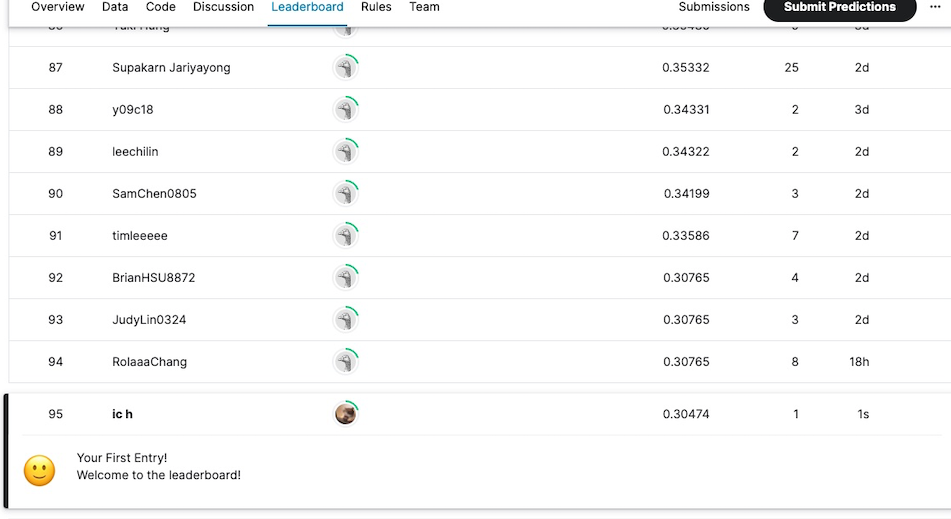

In [144]:
from IPython.display import Image
Image("img/PIC1.png")

In [ ]:
# Thanks to professor and TAs for your help during the lab and class. Thanks a lot!